<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
# Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

Импортируем библиотеку и прочитаем файл с исходными данными,выводим на экран 20 первых значений из таблицы.

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")

Изучим общую информацию о данных.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посчитает пустые значения по столбцам.

In [5]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим уникальные значения для каждого столбца.

In [6]:
for row in data: 
    print(data[row].value_counts())

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64
2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111

Посмотрим полные дубликаты.

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Проверили полные дубликаты-0. Вывели характерные значения таблицы.

### Вывод

Общее количество значений в данных 23699. В таблице 22 столбца.
Пустые значения в столбцах: 
ceiling_height(9195); 
floors_total(86); 
living_area(1903); 
is_apartment(20924); 
kitchen_area(2278); 
balcony(11519); 
locality_name(49); 
airports_nearest(5542); 
cityCenters_nearest(5519); 
parks_around3000(5518); 
parks_nearest(15620); 
ponds_around3000(5518); 
ponds_nearest(14589); 
days_exposition(3181). 
Нули в: 
ponds_around3000(9071) Число водоёмов в радиусе 3 км. Может быть правдой; 
parks_around3000(10106) Число парков в радиусе 3 км. Может быть правдой; 
total_images(1059) Число фотографий квартиры не выставили, наверное с квартирой какие-то проблемы;
balcony(3758) Есть кварты без балконов;
rooms(197) Число комнат,это может быть связано с квартирами-студия. ; 
first_day_exposition есть значения времени 00:00:00.
open_plan, is_apartment, studio булевые значения.




## Предобработка данных

Работа с пропусками.

In [9]:
data['locality_name'].isna().sum()*100/len(data)

0.2067597788936242

In [10]:
data['floors_total'].isna().sum()*100/len(data)

0.36288450989493226

Удалим nan в этих столбцах~0,3%

In [11]:
data.dropna(subset=['locality_name', 'floors_total'], inplace=True) 
display(data['locality_name'].isnull().sum())
data['floors_total'].isnull().sum()

0

0

In [12]:
data['parks_nearest'].isna().sum()*100/len(data)

65.92403988966687

In [13]:
data['parks_nearest'] = data['parks_nearest'].astype('float32')
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median()) 
data['parks_nearest'].isnull().sum()

0

Перевели в тип float32 и поменяли на медиану.

In [14]:
data['parks_around3000'].isna().sum()*100/len(data)

23.33969870570762

In [15]:
data['parks_around3000'] = data['parks_around3000'].astype('float16')
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median()) 
data['parks_around3000'].isnull().sum()

0

Перевели в тип float16 и поменяли на медиану.

In [16]:
data['ponds_around3000'].isna().sum()*100/len(data)

23.33969870570762

In [17]:
data['ponds_around3000'] = data['ponds_around3000'].astype('float16')
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
data['ponds_around3000'].isnull().sum()

0

Перевели в тип float16 и поменяли на медиану.

In [18]:
data['ponds_nearest'].isna().sum()*100/len(data)

61.654996817313815

In [19]:
data['ponds_nearest'] = data['ponds_nearest'].astype('float32')
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['ponds_nearest'].isnull().sum()

0

Перевели в тип float32 и поменяли на медиану.

In [20]:
data['is_apartment'].isna().sum()*100/len(data)

88.28771483131763

In [21]:
data['is_apartment'] = data['is_apartment'].astype('bool') 
data.dropna(subset = ['is_apartment'], inplace = False ) 
data['is_apartment'].isnull().sum()

0

Перевели в бул,заполнили пропуски значением False.

In [22]:
data['ceiling_height'].isna().sum()*100/len(data)

38.54869509866327

In [23]:
data['ceiling_height'] = data['ceiling_height'].astype('float16') 
median_ceiling_height = data.groupby('locality_name')['ceiling_height'].transform('median') 
data['ceiling_height'].fillna(median_ceiling_height,inplace=True) 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
data['ceiling_height'].isnull().sum()

0

Перевели в float16,сгруппировали высоту потолков в зависимости от района,заполнили пропуски медианым значением по районам.Заполнили оставшиеся пропуски медианым значением.

In [24]:
data['balcony'].isna().sum()*100/len(data)

48.6950986632718

In [25]:
data['balcony'] = data['balcony'].fillna(0) 
data['balcony'] = data['balcony'].astype('int8') 
data['balcony'].isnull().sum()

0

Заполняем пропуски на 0(нет балкона).Перевели в int8.

In [26]:
data['airports_nearest'].isna().sum()*100/len(data)

23.44154466369616

In [27]:
data['last_price'] = data['last_price'].astype('float32') 
data['airports_nearest'] = data['airports_nearest'].astype('float32') 
median_airpots_nearest = data.groupby('locality_name')['airports_nearest'].transform('median') 
data['airports_nearest'].fillna(median_airpots_nearest,inplace=True) 
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median()) 
data['airports_nearest'].isnull().sum()

0

Цена на момент снятия с публикации перевели в float32,расстояние до ближайшего аэропорта в метрах перевели в float32.Сгруппировали расстояния до аэропорта по районам,заполнили пропуски медианым значением по районам.Заполнили оставшиеся пропуски медианым значением.

In [28]:
data['living_area'].isna().sum()*100/len(data)

7.91427965202631

In [29]:
data['living_area'] = data['living_area'].astype('float32') 
data['rooms'] = data['rooms'].astype('float16')  
median_liv_area = data.groupby('rooms')['living_area'].transform('median') 
data['living_area'].fillna(median_liv_area,inplace=True) 
data['living_area'].isnull().sum()

0

Перевели жилую площадь в float32,количество комнат в float16.Сгруппировали жилую площадь в зависимости от количества комнат,заполнили пропуски медианым значением.

In [30]:
data['cityCenters_nearest'].isna().sum()*100/len(data)

23.343942287290474

In [31]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float32') 
median_cityCenters_nearest = data.groupby('locality_name')['cityCenters_nearest'].transform('median') 
data['cityCenters_nearest'].fillna(median_cityCenters_nearest,inplace=True) 
median_cityCenters_new = data.groupby('last_price')['cityCenters_nearest'].transform('median') 
data['cityCenters_nearest'].fillna(median_cityCenters_new,inplace=True) 
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median()) 
data['cityCenters_nearest'].isnull().sum()

0

Перевели в float32 расстояние до центра города.Сгруппировали расстояние до центра города по районам,заполнили пропуски медианым значением по районам.Сгруппировали расстояние до центра города в зависимости от цена на момент снятия с публикации,заполнили пропуски медианым значением по цена на момент снятия с публикации.Заполнили оставшиеся пропуски медианым значением.

In [32]:
data['kitchen_area'].isna().sum()*100/len(data)

9.429238277105878

In [33]:
data['kitchen_area'] = data['kitchen_area'].astype('float32') 
data['total_area'] = data['total_area'].astype('float32') 
median_kitchen_area = data.groupby('total_area')['kitchen_area'].transform('median') 
data['kitchen_area'].fillna(median_kitchen_area,inplace=True) 
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) 
data['kitchen_area'].isnull().sum()

0

Перевели в float32 площадь кухни,перевели в float32 площадь квартиры.Сгруппировали площадь кухни в квадратных метрах (м²) по площадь квартиры в квадратных метрах (м²),заполнили пропуски медианым значением по площадь квартиры в квадратных метрах (м²).Заполнили оставшиеся пропуски медианым значением

In [34]:
data['days_exposition'].isna().sum()*100/len(data)

13.456397199236156

In [35]:
data['days_exposition'] = data['days_exposition'].astype('float32') 
median_days_exposition = data.groupby('first_day_exposition')['days_exposition'].transform('median') 
data['days_exposition'].fillna(median_days_exposition,inplace=True) 
median_exposition = data.groupby('locality_name')['days_exposition'].transform('median') 
data['days_exposition'].fillna(median_exposition,inplace=True) 
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()) 
data.isnull().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Перевели в float32 сколько дней было размещено объявление.Сгруппировали сколько дней было размещено объявление по дата публикации,заполнили пропуски медианым значением по дата публикации.Сгруппировали сколько дней было размещено объявление по название населённого пункта,заполнили пропуски медианым значением по название населённого пункта.Заполнили оставшиеся пропуски медианым значением.Посчитали  пустые значения всем по столбцам.

In [36]:
data['parks_around3000'] = data['parks_around3000'].astype('int8') 
data['ponds_around3000'] = data['ponds_around3000'].astype('int8') 
data['floor'] = data['floor'].astype('int8') 
data['floors_total'] = data['floors_total'].astype('int8') 
data['days_exposition'] = data['days_exposition'].astype('int16') 
data['rooms'] = data['rooms'].astype('int8') 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S') 
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float32
total_area              23565 non-null float32
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int8
ceiling_height          23565 non-null float16
floors_total            23565 non-null int8
living_area             23565 non-null float32
floor                   23565 non-null int8
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float32
balcony                 23565 non-null int8
locality_name           23565 non-null object
airports_nearest        23565 non-null float32
cityCenters_nearest     23565 non-null float32
parks_around3000        23565 non-null int8
parks_nearest           23565 non-null float32
ponds_around3000  

Число парков,число водоемов,этаж,всего этажей в доме,количество комнат перевели в int8,сколько дней было размещено объявление перевели в int16.Дату публикации перевели в формат даты и округлили до дня.

In [37]:
display(data['locality_name'].unique())
len(data['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

364

In [38]:
data['locality_name'] = data['locality_name'].str.lower() 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True) 
data['locality_name'] = data['locality_name'].replace(['село'], 'поселок')
data['locality_name'] = data['locality_name'].replace('деревня', 'поселок', regex=True)

display(data['locality_name'].unique())
len(data['locality_name'].unique())

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'поселок кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'поселок федоровское', 'выборг', 'кронштадт', 'кировск',
       'поселок новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'поселок пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'поселок куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'поселок заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'поселок старая',
       'поселок лесколово', 'поселок новый свет

325

В названии населенного пункта привели все значения к одному регистру.Заменили ё на е в словах.Заменили слова село и деревня на поселок,так как один и тот же населенный пункт может быть записан под разными типами.

In [39]:
def locality_name_group(locality_name): 
    if locality_name == 'санкт-петербург':
        return 'Cанкт-Петербург'
    return 'область'
data['locality_name_group'] = data['locality_name'].apply(locality_name_group) 

data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_group
0,20,13000000.0,108.000000,2019-03-07,3,2.699219,16,51.000000,8,True,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,29,Cанкт-Петербург
1,7,3350000.0,40.400002,2018-12-04,1,2.615234,11,18.600000,1,True,...,2,поселок шушары,12817.0,18603.0,0,455.0,0,503.0,81,область
2,10,5196000.0,56.000000,2015-08-20,2,2.699219,5,34.299999,4,True,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,Cанкт-Петербург
3,0,64900000.0,159.000000,2015-07-24,3,2.699219,14,45.000000,9,True,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,Cанкт-Петербург
4,2,10000000.0,100.000000,2018-06-19,2,3.029297,14,32.000000,13,True,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,Cанкт-Петербург


Разбили на категории: город и область и создали новый столбец.

### Вывод
Удалили пустые значения в столбцах locality_name,  floors_total, так как они не значительны. Заменили в столбцах parks_around3000, parks_nearest, ponds_around3000, 
ponds_nearest медианой, так как они не сильно важны для решения поставленных задач. Заполнить пропуски значением False в столбце is_apartment, так как что не так с данными. Заменили в столбце ceiling_height медианой по locality_name, высота потолка зависит от типа домов по району, оставшиеся 120 значений-заполняем медианой. В balcony пропуски заменяем на нули, так как квартиры могут быть и без балкона. В airports_nearest заменили на медиану по locality_name (по месту расположения квартиры). Осталось пропусков 5432, заменим их медианой. В living_area заменили по числу комнат. В cityCenters_nearest заменили по районам. Осталось пропусков 5432, заменили медианой по цене, потому что цена может зависить от района. Осталось пропусков 1105, заполнили их медианой. В kitchen_area заменили пропуски по площади квартиры. Осталось пропусков 185, заменили медианой. В days_exposition заменили по дате публикации. Осталось 111, их заменили по району. Осталось 2 - заменили медианой. Собрали пустые значения. Перевели в целый тип - этажи, дни, комнаты целые, число парковок, число водоемов. Убрали часы в датах.

## Расчёты и добавление результатов в таблицу

In [40]:
data['cost_per_m2'] = data['last_price'] / data['total_area'] 
data['cost_per_m2'].head()

0    120370.367188
1     82920.789062
2     92785.710938
3    408176.093750
4    100000.000000
Name: cost_per_m2, dtype: float32

Посчитали и сделали столбец со стоимостью за м2.

In [41]:
data['weekday'] = data['first_day_exposition'].dt.weekday 
data['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

Создали столбец с днем недели.

In [42]:
data['month'] = data['first_day_exposition'].dt.month 
data['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

Создали столбец с месяцем.

In [43]:
data['year'] = data['first_day_exposition'].dt.year 
data['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

Создали столбец с годом.

In [44]:
def floor_group(row):
    number_floor = row['floor']
    total_floor = row['floors_total']
    if number_floor == 1:
        return 'Первый этаж'
    if number_floor == total_floor:
        return 'Последний этаж'
    return 'Другой этаж'       
    
data['floor_group'] = data.apply(floor_group, axis=1) 
data['floor_group'].value_counts()

Другой этаж       17326
Последний этаж     3330
Первый этаж        2909
Name: floor_group, dtype: int64

Этаж разбили на группы: первый,последний,другой и добавили столбец.

In [45]:
data['living_total_area'] = data['living_area'] / data['total_area'] 
data['kitchen_total_area'] = data['kitchen_area'] / data['total_area'] 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_group,cost_per_m2,weekday,month,year,floor_group,living_total_area,kitchen_total_area
0,20,13000000.0,108.000000,2019-03-07,3,2.699219,16,51.000000,8,True,...,755.0,29,Cанкт-Петербург,120370.367188,3,3,2019,Другой этаж,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.615234,11,18.600000,1,True,...,503.0,81,область,82920.789062,1,12,2018,Первый этаж,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.699219,5,34.299999,4,True,...,574.0,558,Cанкт-Петербург,92785.710938,3,8,2015,Другой этаж,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.699219,14,45.000000,9,True,...,234.0,424,Cанкт-Петербург,408176.093750,4,7,2015,Другой этаж,0.283019,0.094340
4,2,10000000.0,100.000000,2018-06-19,2,3.029297,14,32.000000,13,True,...,48.0,121,Cанкт-Петербург,100000.000000,1,6,2018,Другой этаж,0.320000,0.410000


Посчитали и добавили в таблицу соотношение жилой и общей площади.Посчитали и добавили отношение площади кухни к общей.

## Исследовательский анализ данных


In [46]:
data['total_area'].describe()

count    23565.000000
mean        60.322826
std         35.657059
min         12.000000
25%         40.000000
50%         52.000000
75%         69.699997
max        900.000000
Name: total_area, dtype: float64

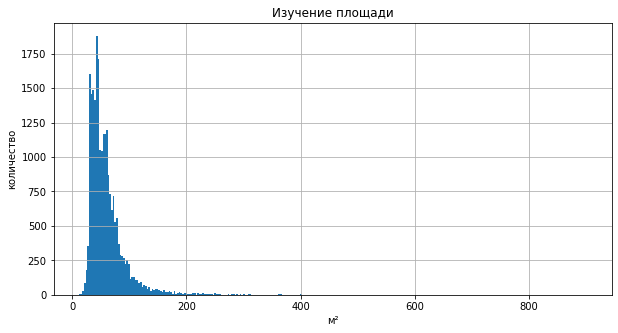

In [47]:
data['total_area'].hist(bins=300, range=(12, 900), figsize=(10, 5)) 
plt.title('Изучение площади')
plt.ylabel('количество')
plt.xlabel('м²')
plt.show()

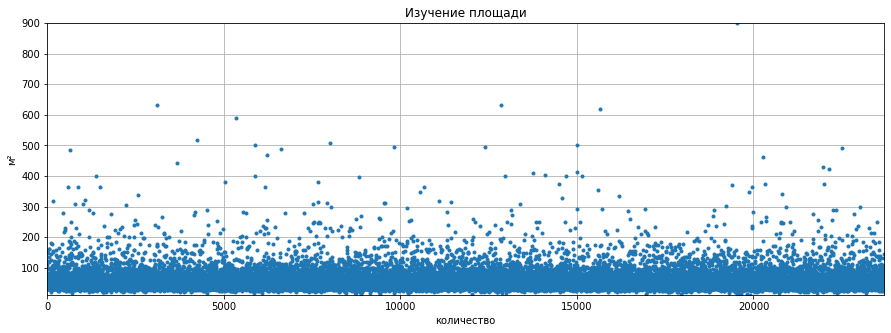

In [48]:
data.plot(y='total_area', ylim=(12, 900), style='.', grid=True, figsize=(15, 5),legend=False)
plt.title('Изучение площади')
plt.ylabel('м²')
plt.xlabel('количество')
plt.show()

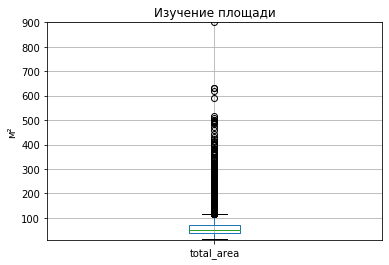

In [49]:
plt.ylim(10, 900) #построим диаграмму размаха
data.boxplot(column='total_area')
plt.title('Изучение площади')
plt.ylabel('м²')
plt.show()

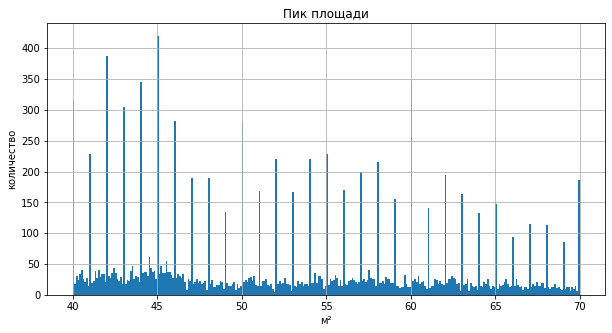

In [50]:
data['total_area'].hist(bins=300, range=(40, 70), figsize=(10, 5)) 
plt.title('Пик площади')
plt.ylabel('количество')
plt.xlabel('м²')
plt.show()

Вывели характерные значения. Построили гистограмму с мах и мin значением по площади квартиры. Среднее значение площади квартир 60м²,медиана 52м²,больше квартир с 69м² и меньше среднего 40м². Высокий пик виден от 40м²-70м²,после 60м² виден спад, а после 114м² и до 12м² выбросы. Избавимся от выбросов.

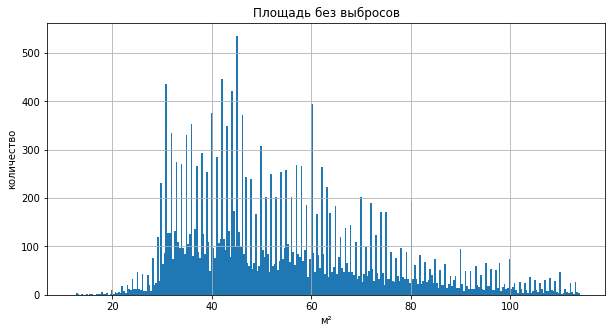

In [51]:
data = data.query('12 < total_area < 114')
data['total_area'].hist(bins=300, range=(12, 114), figsize=(10, 5)) 
plt.title('Площадь без выбросов')
plt.ylabel('количество')
plt.xlabel('м²')
plt.show()

In [52]:
data['cost_per_m2'].describe()

count     22298.000000
mean      95946.617188
std       37744.917969
min         111.834862
25%       75757.578125
50%       94117.648438
75%      112373.005859
max      848484.875000
Name: cost_per_m2, dtype: float64

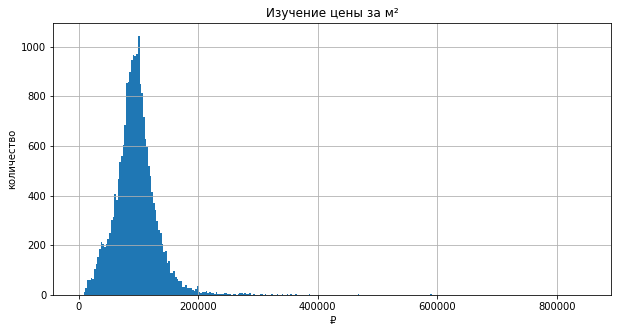

In [53]:
data['cost_per_m2'].hist(bins=300, range=(111, 848484), figsize=(10, 5)) #построим гистограмму
plt.title('Изучение цены за м²')
plt.ylabel('количество')
plt.xlabel('₽')
plt.show()

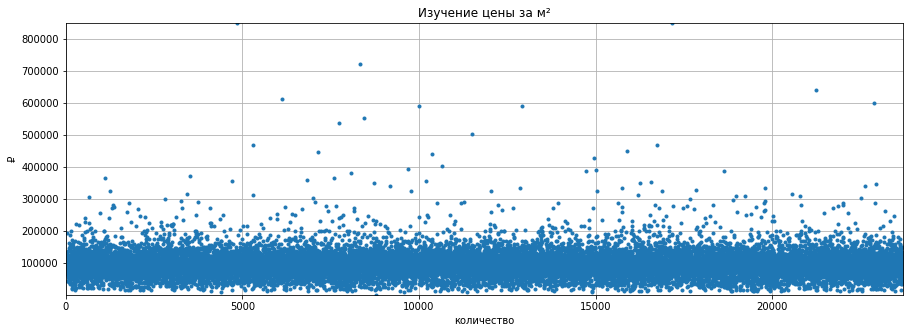

In [54]:
data.plot(y='cost_per_m2', ylim=(111, 848484), style='.', grid=True, figsize=(15, 5),legend=False)
plt.title('Изучение цены за м²')
plt.xlabel('количество')
plt.ylabel('₽')
plt.show()

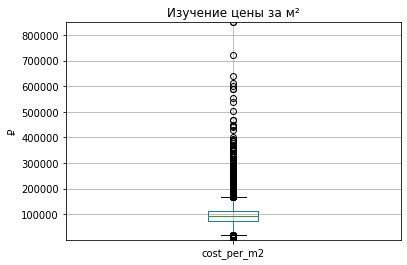

In [55]:
plt.ylim(111 ,848484) #построим диаграмму размаха
data.boxplot(column='cost_per_m2')
plt.title('Изучение цены за м²')
plt.ylabel('₽')
plt.show()

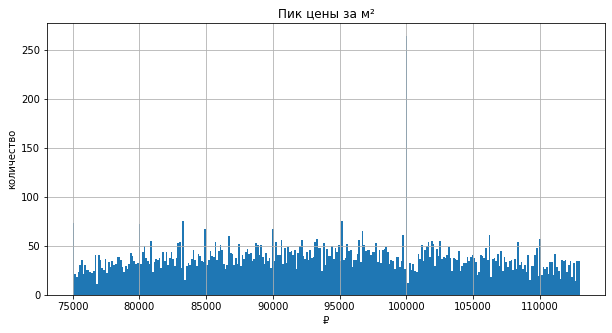

In [56]:
data['cost_per_m2'].hist(bins=300, range=(75000, 113000), figsize=(10, 5)) #построим гистограмму
plt.title('Пик цены за м²')
plt.ylabel('количество')
plt.xlabel('₽')
plt.show()

Правильно будет рассмотреть гистограмму для цены за квадратный метр. Построили гистограмму с мах и мin значением по цене за метр. Среднее значение стоимости 95т.р.за м²,медиана 94т.р.за м². Высокий пик виден от 75т.р.за м²-113т.р.за м²,после 120т.р.за м² виден спад, а после 167т.р.за м² и до 20т.р. за м² выбросы. Избавимся от выбросов.

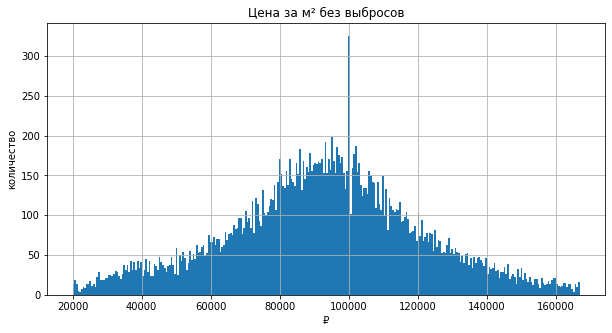

In [57]:
data = data.query('20000 < cost_per_m2 < 167000')
data['cost_per_m2'].hist(bins=300, range=(20000, 167000), figsize=(10, 5)) #построим гистограмму
plt.title('Цена за м² без выбросов')
plt.ylabel('количество')
plt.xlabel('₽')
plt.show()

In [58]:
data['rooms'].describe()

count    21481.000000
mean         1.942600
std          0.900502
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [59]:
data['rooms'].value_counts()

1    7777
2    7514
3    5166
4     758
0     189
5      69
6       7
7       1
Name: rooms, dtype: int64

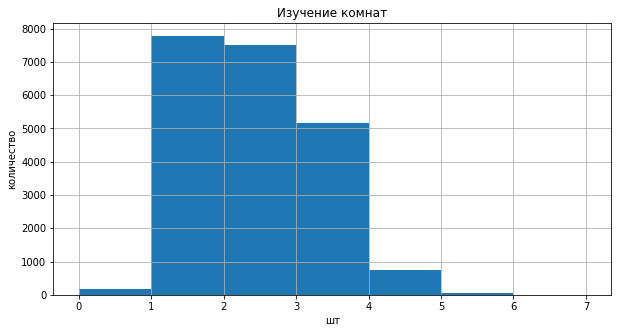

In [60]:
data['rooms'].hist(bins=7, range=(0, 7), figsize=(10, 5)) #построим гистограмму
plt.title('Изучение комнат')
plt.ylabel('количество')
plt.xlabel('шт')
plt.show()

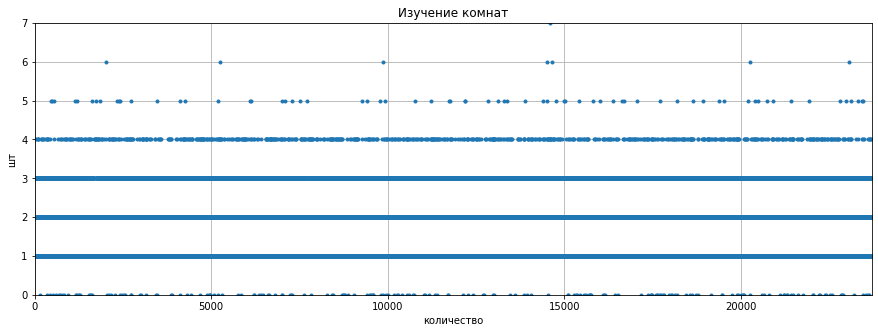

In [61]:
data.plot(y='rooms', ylim=(0, 7), style='.', grid=True, figsize=(15, 5), legend=False)
plt.title('Изучение комнат')
plt.xlabel('количество')
plt.ylabel('шт')
plt.show()

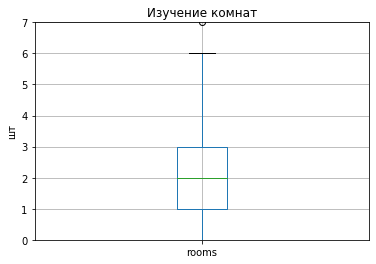

In [62]:
plt.ylim(0, 7) #построим диаграмму размаха
data.boxplot(column='rooms')
plt.title('Изучение комнат')
plt.ylabel('шт')
plt.show()

Вывели характерные значения и уникальные для столбца. Построили гистограмму с мах и мin значением по количеству комнат.
Видим,что в основном покупают квартиры 1-3 комнатные. После 6 комнат уже выбросы. Избавимся от выбросов.

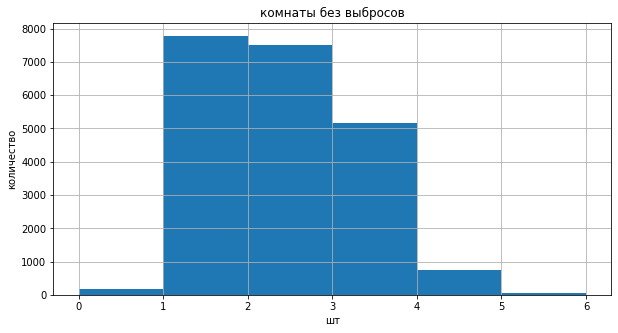

In [63]:
data = data.query('rooms < 6')
data['rooms'].hist(bins=6, range=(0, 6), figsize=(10, 5)) #построим гистограмму
plt.title('комнаты без выбросов')
plt.ylabel('количество')
plt.xlabel('шт')
plt.show()

In [64]:
data['ceiling_height'].describe()

count    21473.000000
mean         2.707031
std          0.798340
min          1.000000
25%          2.550781
50%          2.699219
75%          2.699219
max         32.000000
Name: ceiling_height, dtype: float64

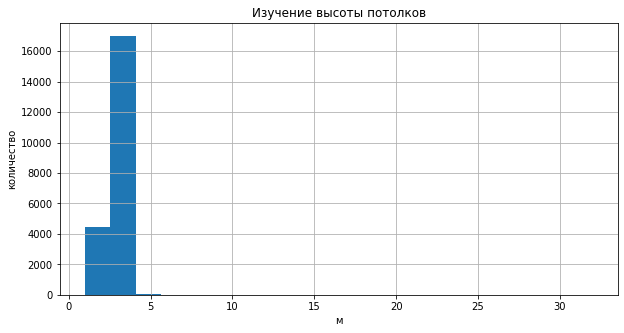

In [65]:
data['ceiling_height'].hist(bins=20, range=(1, 32), figsize=(10, 5)) #построим гистограмму
plt.title('Изучение высоты потолков')
plt.ylabel('количество')
plt.xlabel('м')
plt.show()

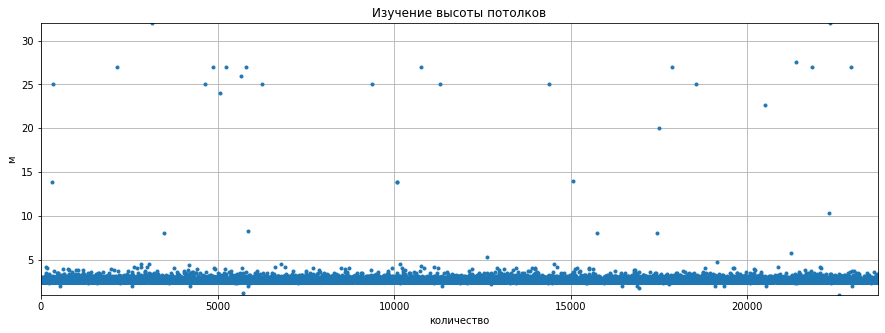

In [66]:
data.plot(y='ceiling_height', ylim=(1, 32), style='.', grid=True, figsize=(15, 5), legend=False)
plt.title('Изучение высоты потолков')
plt.xlabel('количество')
plt.ylabel('м')
plt.show()

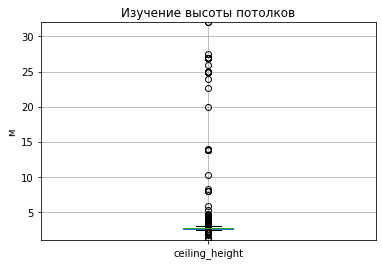

In [67]:
plt.ylim(1, 32) #построим диаграмму размаха
data.boxplot(column='ceiling_height')
plt.title('Изучение высоты потолков')
plt.ylabel('м')
plt.show()

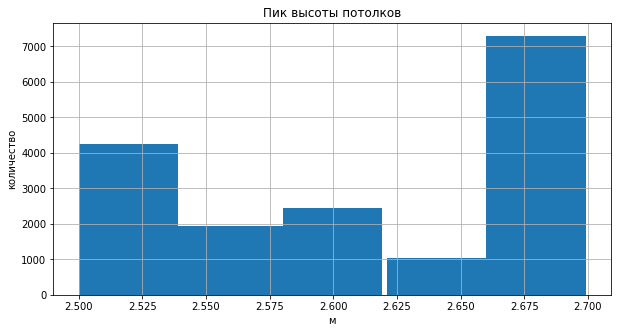

In [68]:
data['ceiling_height'].hist(bins=5, range=(2.5, 2.7), figsize=(10, 5)) #построим гистограмму
plt.title('Пик высоты потолков')
plt.ylabel('количество')
plt.xlabel('м')
plt.show()

Вывели характерные значения для столбца. Построили гистограмму с мах и мin значением по высоте потолка. Средняя и медиана почти одинаковы 2.7м потолки.Пик 2.5м-2.7м. До 2.4 и  после 2.9м выбросы. Избавимся от выбросов.

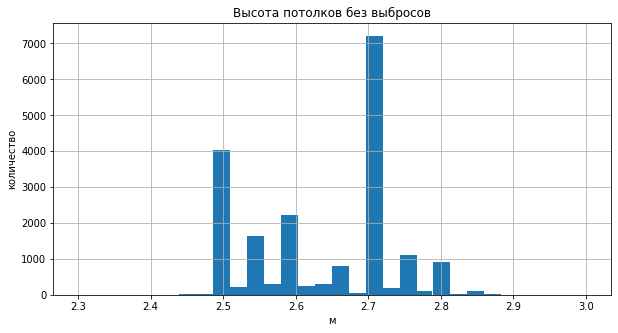

In [69]:
data = data.query('2.4 < ceiling_height < 2.9')
data['ceiling_height'].hist(bins=30, range=(2.3, 3), figsize=(10, 5)) #построим гистограмму
plt.title('Высота потолков без выбросов')
plt.ylabel('количество')
plt.xlabel('м')
plt.show()

In [70]:
data['days_exposition'].describe()

count    19506.000000
mean       156.296729
std        201.726230
min          1.000000
25%         35.000000
50%         77.000000
75%        190.750000
max       1580.000000
Name: days_exposition, dtype: float64

In [71]:
data['days_exposition'].value_counts()

45      878
60      543
7       306
5       255
4       206
       ... 
839       1
903       1
951       1
983       1
1255      1
Name: days_exposition, Length: 1061, dtype: int64

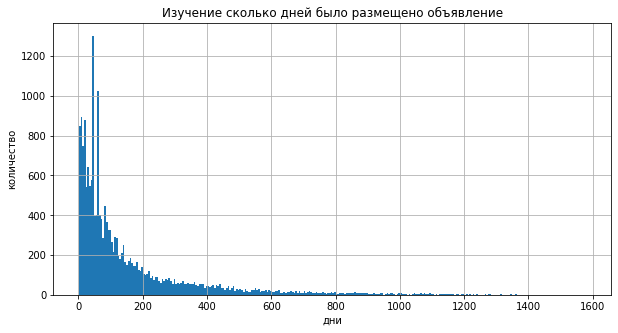

In [72]:
data['days_exposition'].hist(bins=300, range=(1, 1580), figsize=(10, 5)) #построим гистограмму
plt.title('Изучение сколько дней было размещено объявление')
plt.ylabel('количество')
plt.xlabel('дни')
plt.show()

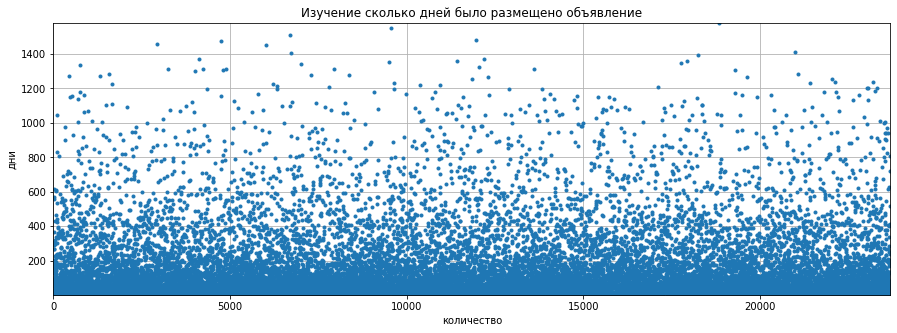

In [73]:
data.plot(y='days_exposition', ylim=(1, 1580), style='.', grid=True, figsize=(15, 5), legend=False)
plt.title('Изучение сколько дней было размещено объявление')
plt.xlabel('количество')
plt.ylabel('дни')
plt.show()

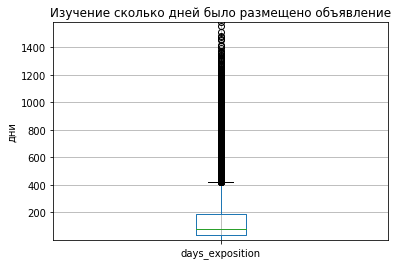

In [74]:
plt.ylim(1,1580) #построим диаграмму размаха
data.boxplot(column='days_exposition')
plt.title('Изучение сколько дней было размещено объявление')
plt.ylabel('дни')
plt.show()

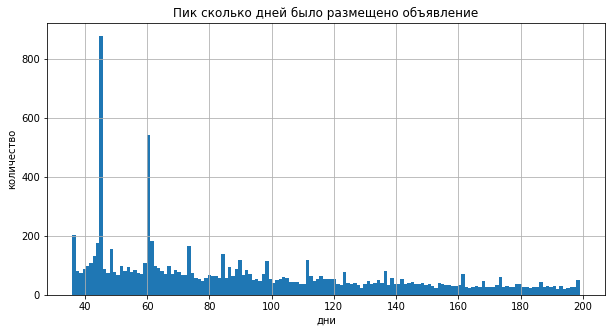

In [75]:
data['days_exposition'].hist(bins=150, range=(36, 199), figsize=(10, 5)) #построим гистограмму
plt.title('Пик сколько дней было размещено объявление')
plt.ylabel('количество')
plt.xlabel('дни')
plt.show()

Рассмотрели внимательней дни до 100,видим пики примерно каждые 15 дней.Скорей всего это связанно с зачислением зарплаты.

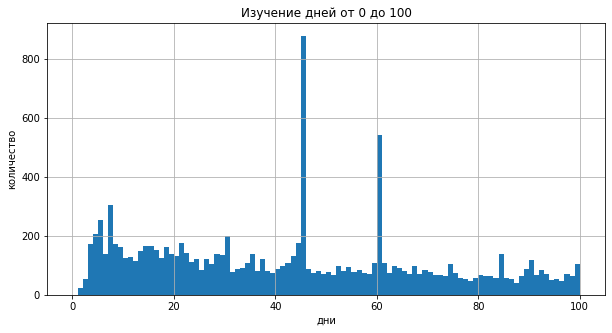

In [76]:
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(10, 5)) #построим гистограмму
plt.title('Изучение дней от 0 до 100')
plt.ylabel('количество')
plt.xlabel('дни')
plt.show()

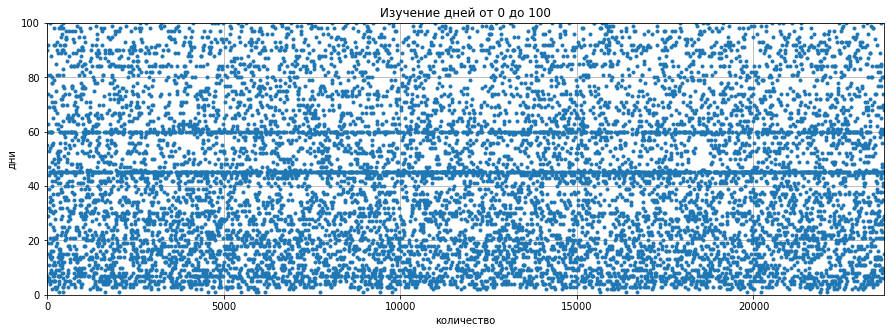

In [77]:
data.plot(y='days_exposition', ylim=(0, 100), style='.', grid=True, figsize=(15, 5), legend=False)
plt.title('Изучение дней от 0 до 100')
plt.xlabel('количество')
plt.ylabel('дни')
plt.show()

Вывели характерные значения для столбца. Построили гистограмму с мах и мin значением по количество дней размещения объявлений. Среднее значение 161 дней,медиана 82 дня. В основном продажи совершаются от 36-199 дней,лидером являются 45 и 60 дни. После 200 дней идет спад,а после 440-выброс. Самые быстрые продажи 1 день.Самая долгая продожа на 427 день(если отбросить выбросы). Уберем быстрые продажи(до 7 дней) и выбросы.

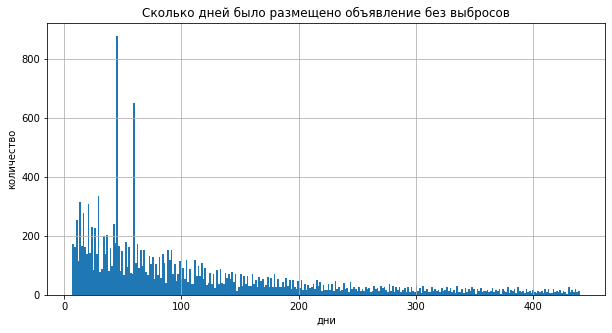

In [78]:
data = data.query('7 < days_exposition < 440')
data['days_exposition'].hist(bins=300, range=(7, 440), figsize=(10, 5)) #построим гистограмму
plt.title('Сколько дней было размещено объявление без выбросов')
plt.ylabel('количество')
plt.xlabel('дни')
plt.show()

На стоимость квартиры влияет ее местоположенте: город-область,транспортная доступность,инфраструктура,престижность района. Какого типа постройка,этажность и этаж,площадь,количество комнат,ремонт,год постройки.Изучим, зависит ли цена от площади, числа комнат, удалённости от центра.

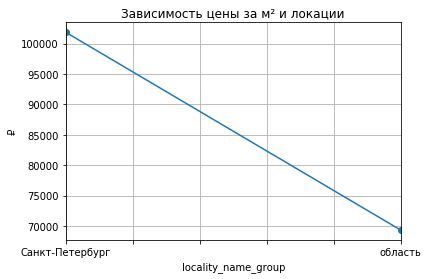

In [79]:
(data
    .groupby('locality_name_group')['cost_per_m2'].median()
    .plot(x='locality_name_group',y='cost_per_m2',style='o-',grid=True)
) #построим гистограмму
plt.title('Зависимость цены за м² и локации')
plt.ylabel('₽')
plt.show()

Видим,что цена за м² уменьшается от города к области.

In [80]:
per_area_rooms_centers = data.loc[:,['cost_per_m2', 'total_area', 'rooms', 'cityCenters_nearest']]
per_area_rooms_centers.corr()

,cost_per_m2,total_area,rooms,cityCenters_nearest
cost_per_m2,1.000000,-0.001838,-0.191101,-0.377599
total_area,-0.001838,1.000000,0.796189,-0.142290
rooms,-0.191101,0.796189,1.000000,-0.077470
cityCenters_nearest,-0.377599,-0.142290,-0.077470,1.000000


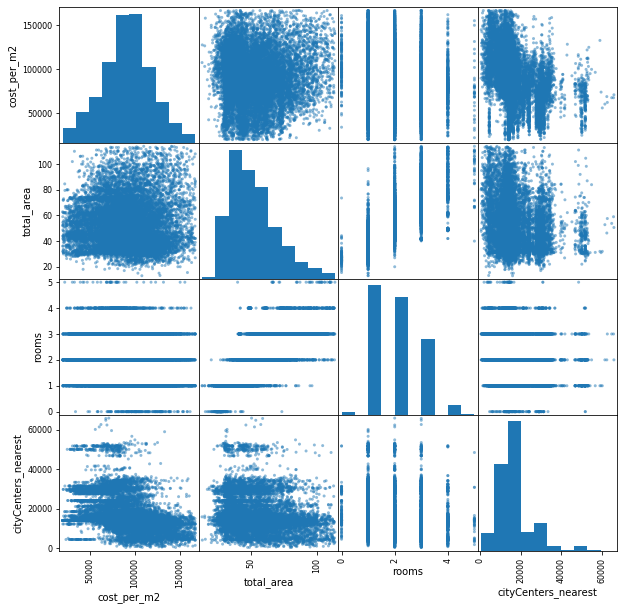

In [81]:
pd.plotting.scatter_matrix(per_area_rooms_centers, figsize=(10, 10)) #построим гистограмму
plt.show()

Цена слабо зависит от площади. В основном покупают квартиры 40м²-70м². Это за 72т.р.за м²-107т.р.за м².
Количество комнат почти не влияет на стоимость квартиры,при этом увеличивается площадь,но уменьшается количество продаж. Самые распространенные квартиры от 2 до 3 комнат. Удаленность от центра влияет на стоимость квартиры. Чем дальше,тем цена ниже. Но продаж ближе к центру больше и в область их становится меньше. Здесь все логично,в центре "вся жизнь".

In [82]:
per_floor = data.loc[:,['cost_per_m2', 'floor']] 
per_floor.corr() 

,cost_per_m2,floor
cost_per_m2,1.000000,0.287546
floor,0.287546,1.000000


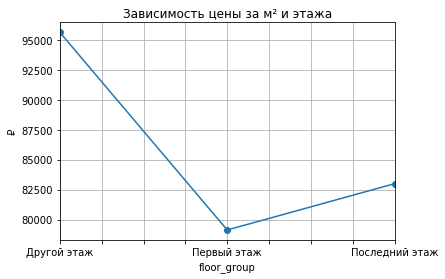

In [83]:
(data
    .groupby('floor_group')['cost_per_m2'].median()
    .plot(x='floor_group',y='cost_per_m2',style='o-',grid=True)
) #построим гистограмму
plt.title('Зависимость цены за м² и этажа')
plt.ylabel('₽')
plt.show()

Цена зависит от этажа,но не сильно. Видим,что квартиры на последних этажах покупают охотней всего,а на первых реже всего. На первом этаже квартиры дешевле.

In [84]:
per_weekday_month_year = data.loc[:,['cost_per_m2', 'weekday', 'month', 'year']] 
per_weekday_month_year.corr()

,cost_per_m2,weekday,month,year
cost_per_m2,1.000000,-0.007158,-0.003171,0.079106
weekday,-0.007158,1.000000,0.008271,-0.004087
month,-0.003171,0.008271,1.000000,-0.291004
year,0.079106,-0.004087,-0.291004,1.000000


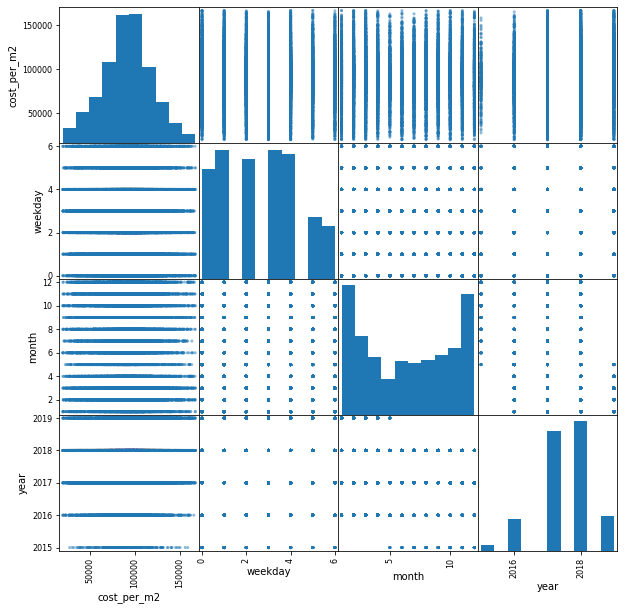

In [85]:
pd.plotting.scatter_matrix(per_weekday_month_year, figsize=(10, 10)) #построим гистограмму
plt.show()

Цена очень слабо зависит от дней,месяцев и лет. Видим,что в выходные чуть меньше покупок,так же в конце месяца их меньше,чем в начале,под конец года тоже виден спад, но из года в год число продаж растет.

Посчитаем значения для locality_name по cost_per_m2.

In [86]:
raiting_of_location = data.pivot_table(index='locality_name',values='cost_per_m2',aggfunc=('count','mean', 'min', 'max'))
raiting_of_location.sort_values(by='count',ascending=False).head()

,count,max,mean,min
locality_name,,,,
санкт-петербург,10392,166859.781250,104621.375000,24439.919922
поселок мурино,472,138580.234375,85988.695312,51460.480469
поселок шушары,389,147826.093750,78600.070312,47700.417969
всеволожск,323,136125.000000,67249.250000,38226.296875
поселок парголово,286,138522.421875,89388.179688,48405.464844


Вывели 10 населённых пунктов с наибольшим числом объявлений. Посчитали среднюю цену м² в этих населённых пунктах. Лидером по количеству объявлений становится Санкт-Петербург,так же он лидирует по максимальной цене за м²,но и минимальная цена за квадрат тоже у него. Видим, что в городе Пушкин максимальная цена выше остальных городов области,а минимальная выше всего списка.Делаем выводы,что там престижное жилье(и действительно,там находятся Екатерининский дворец, Царское село). В Выборге меньше всего объявлений и самое дешевое жилье из нашего списка.  

In [87]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000 
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int64') 
data['locality_name_group'].value_counts()

Cанкт-Петербург    10392
область             6257
Name: locality_name_group, dtype: int64

Срез квартир до 1км.

In [88]:
center_1_km = data.query('cityCenters_nearest_km < 1') 
center_1_km.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_group,cost_per_m2,weekday,month,year,floor_group,living_total_area,kitchen_total_area,cityCenters_nearest_km
1104,0,7970000.0,63.000000,2018-02-09,3,2.699219,5,35.000000,3,True,...,15,Cанкт-Петербург,126507.937500,4,2,2018,Другой этаж,0.555556,0.158730,0
2609,20,7200000.0,80.000000,2017-08-24,3,2.800781,4,43.000000,1,True,...,11,Cанкт-Петербург,90000.000000,3,8,2017,Первый этаж,0.537500,0.100000,0
2988,2,5300000.0,49.000000,2016-11-09,3,2.699219,3,30.000000,3,True,...,232,Cанкт-Петербург,108163.265625,2,11,2016,Последний этаж,0.612245,0.142857,0
3800,12,6900000.0,47.599998,2015-07-22,2,2.699219,5,28.200001,5,True,...,398,Cанкт-Петербург,144957.984375,2,7,2015,Последний этаж,0.592437,0.172269,0
5747,3,9500000.0,81.000000,2016-05-17,2,2.699219,4,41.000000,2,True,...,159,Cанкт-Петербург,117283.953125,1,5,2016,Другой этаж,0.506173,0.197531,0


Количество квартир <=8.

In [89]:
len(data.query('cityCenters_nearest_km <= 8'))

1632

Посчитаем средние значения.

In [90]:
data_stat = data.pivot_table(index="locality_name_group", values="cityCenters_nearest_km")
data_stat

,cityCenters_nearest_km
locality_name_group,
Cанкт-Петербург,12.430139
область,21.925204


Cначала перевели метры в километры,потом округлили до челых чисел. Посмотрели сколько объявлений по Питеру(10392) и по области(6257). Квартиры ,которые находятся в центре,стоят с километражем 0,таких 14 квартир. Посмотрели в интернете,что центральная часть Питера это примерно 8км,таких значений 1632. Посчтитали, что среднее значение по городу 12км и по области 21км.

In [91]:
per_km = data.loc[:,['cost_per_m2', 'cityCenters_nearest_km']]
per_km.corr()

,cost_per_m2,cityCenters_nearest_km
cost_per_m2,1.000000,-0.381172
cityCenters_nearest_km,-0.381172,1.000000


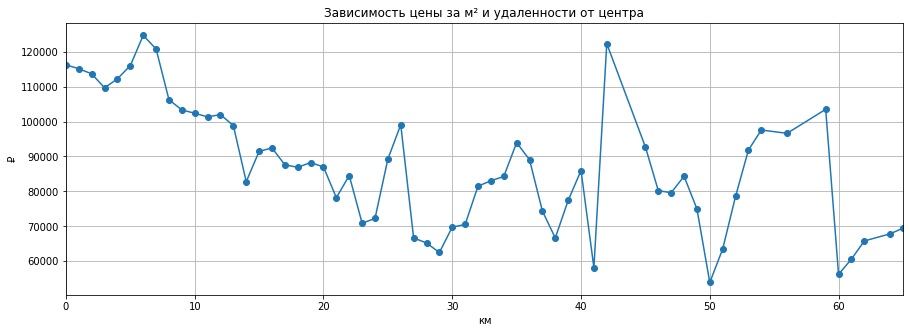

In [92]:
(data
    .groupby('cityCenters_nearest_km')['cost_per_m2'].median()
    .plot(x='cityCenters_nearest_km',y='cost_per_m2',style='o-',grid=True, figsize=(15,5))
) #построим гистограмму
plt.title('Зависимость цены за м² и удаленности от центра')
plt.xlabel('км')
plt.ylabel('₽')
plt.show()

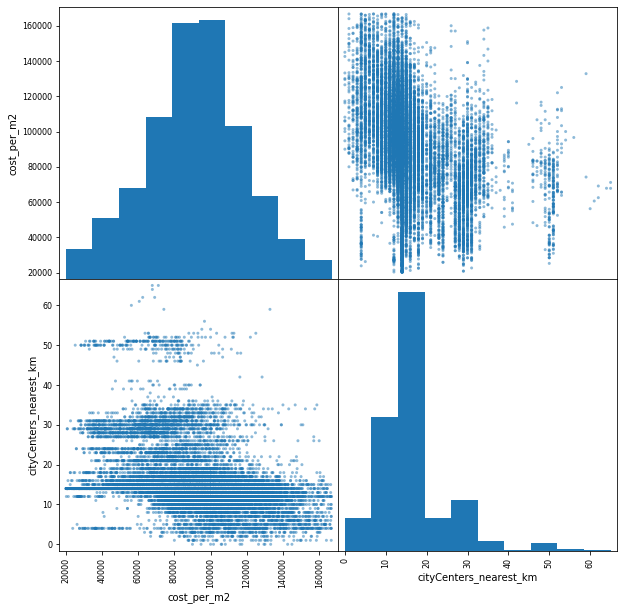

In [93]:
pd.plotting.scatter_matrix(per_km, figsize=(10, 10)) #построим гистограмму
plt.show()

Цена м² влияет на удаленность от центра,но так же видны сплески по цене. Скорей всего это из-за престижных районов вне Питера. Видно,чем дальше от центра ,тем меньше продаж и цена спускается.

In [94]:
data['cityCenters_nearest_km'].describe()

count    16649.000000
mean        15.998558
std          8.210894
min          0.000000
25%         12.000000
50%         14.000000
75%         17.000000
max         65.000000
Name: cityCenters_nearest_km, dtype: float64

In [95]:
data['cityCenters_nearest_km'].value_counts()

14    2630
15    1626
13    1432
12    1355
16    1186
11    1112
10     659
17     593
9      479
8      368
18     357
30     336
29     328
4      314
21     314
19     304
31     276
28     276
5      266
7      221
24     214
6      192
23     190
27     180
3      142
32     137
22     129
34     118
33     105
20     101
51      99
25      96
26      74
50      72
2       68
35      54
1       46
49      33
52      29
36      18
48      18
46      17
0       15
39      12
40      12
53      10
41       8
47       7
37       5
65       2
42       2
59       2
62       2
54       2
38       1
56       1
60       1
64       1
45       1
61       1
Name: cityCenters_nearest_km, dtype: int64

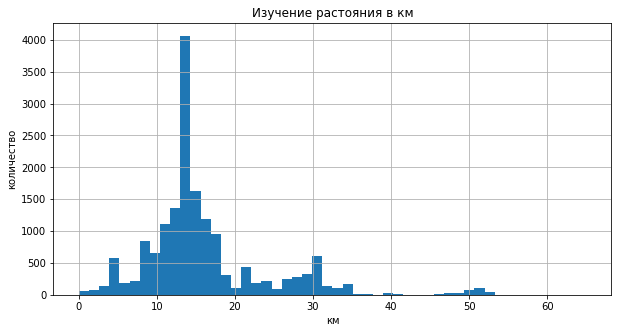

In [96]:
data['cityCenters_nearest_km'].hist(bins=50, range=(0, 65), figsize=(10, 5)) #построим гистограмму
plt.title('Изучение растояния в км')
plt.ylabel('количество')
plt.xlabel('км')
plt.show()

Для начала рассмотрим весь столбец расстояние в км. Среднее значение 15.5, медиана 14(рядом). По гисторграмме видно,что есть высокий пик и длинные "усы".

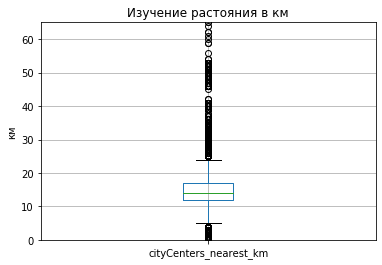

In [97]:
plt.ylim(0,65) #построим диаграмму размаха
data.boxplot(column='cityCenters_nearest_km')
plt.title('Изучение растояния в км')
plt.ylabel('км')
plt.show()

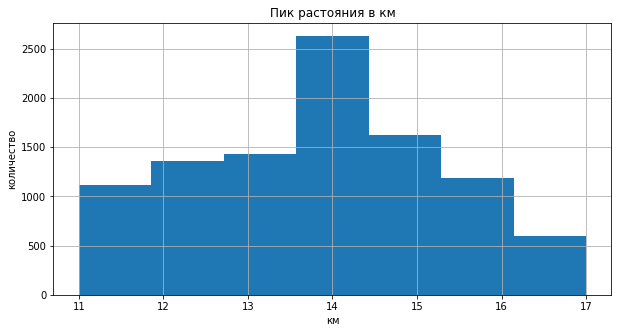

In [98]:
data['cityCenters_nearest_km'].hist(bins=7, range=(11, 17), figsize=(10, 5)) #построим гистограмму
plt.title('Пик растояния в км')
plt.ylabel('количество')
plt.xlabel('км')
plt.show()

Пик квартир идет на значении 11-17км.

In [99]:
ceiling_km = data.loc[:,['ceiling_height', 'cityCenters_nearest_km']]
ceiling_km.corr()

,ceiling_height,cityCenters_nearest_km
ceiling_height,1.000000,-0.253727
cityCenters_nearest_km,-0.253727,1.000000


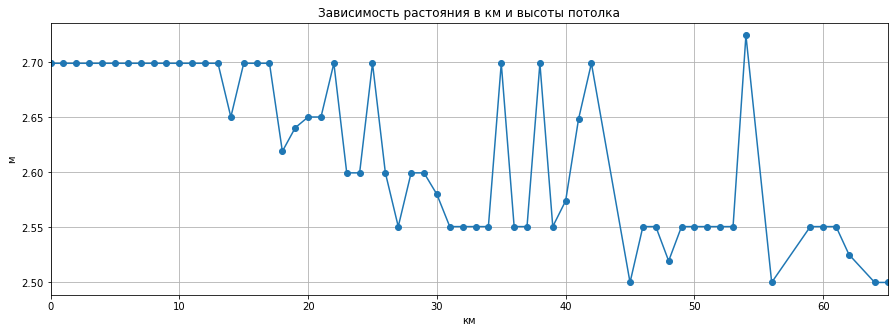

In [100]:
(data
    .groupby('cityCenters_nearest_km')['ceiling_height'].median()
    .plot(x='cityCenters_nearest_km',y='ceiling_height',style='o-',grid=True, figsize=(15,5))
) #построим гистограмму
plt.title('Зависимость растояния в км и высоты потолка')
plt.ylabel('м')
plt.xlabel('км')
plt.show()

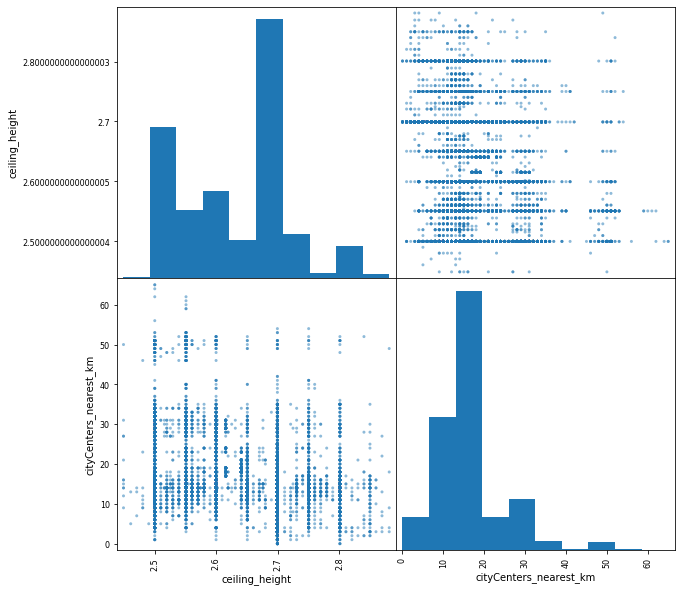

In [101]:
pd.plotting.scatter_matrix(ceiling_km, figsize=(10, 10))
plt.show()

Зависимость мала,но есть, между расположением квартиры и высоты потолка. Наблюдаем, что в центре потолки идут одинаково,а после центра уже скачут.

In [102]:
area_km = data.loc[:,['total_area', 'cityCenters_nearest_km']]
area_km.corr()

,total_area,cityCenters_nearest_km
total_area,1.000000,-0.143435
cityCenters_nearest_km,-0.143435,1.000000


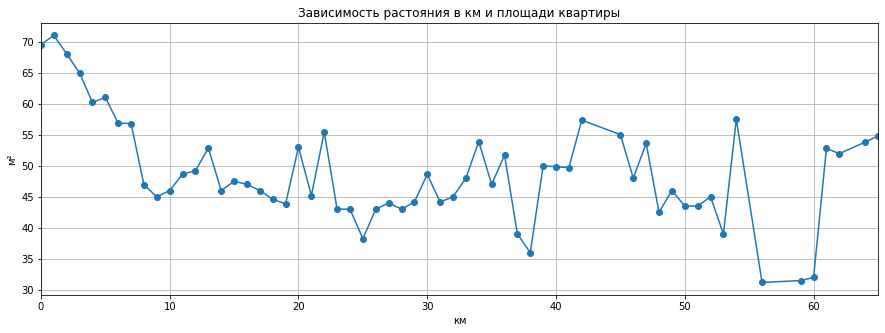

In [103]:
(data
    .groupby('cityCenters_nearest_km')['total_area'].median()
    .plot(x='cityCenters_nearest_km',y='total_area',style='o-',grid=True, figsize=(15,5))
) #построим гистограмму
plt.title('Зависимость растояния в км и площади квартиры')
plt.ylabel('м²')
plt.xlabel('км')
plt.show()

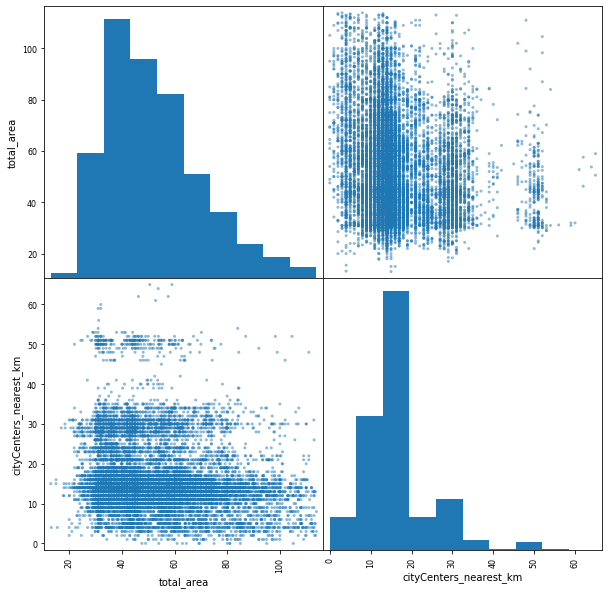

In [104]:
pd.plotting.scatter_matrix(area_km, figsize=(10, 10))
plt.show()

Зависимость очень мала. На графике видно,что в центре квартиры большой площадью(60-75),потом идет медленный спад и иногда скачет вверх.Скорей всего это из-за количества комнат.

In [105]:
rooms_km = data.loc[:,['rooms', 'cityCenters_nearest_km']]
rooms_km.corr()

,rooms,cityCenters_nearest_km
rooms,1.000000,-0.078331
cityCenters_nearest_km,-0.078331,1.000000


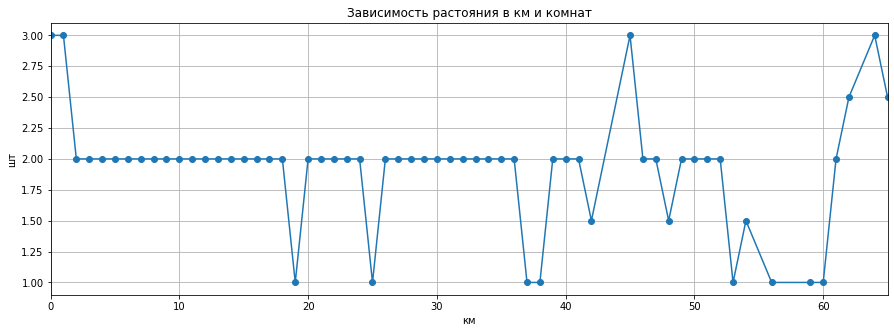

In [106]:
(data
    .groupby('cityCenters_nearest_km')['rooms'].median()
    .plot(x='cityCenters_nearest_km',y='rooms',style='o-',grid=True, figsize=(15,5))
) #построим гистограмму
plt.title('Зависимость растояния в км и комнат')
plt.ylabel('шт')
plt.xlabel('км')
plt.show()

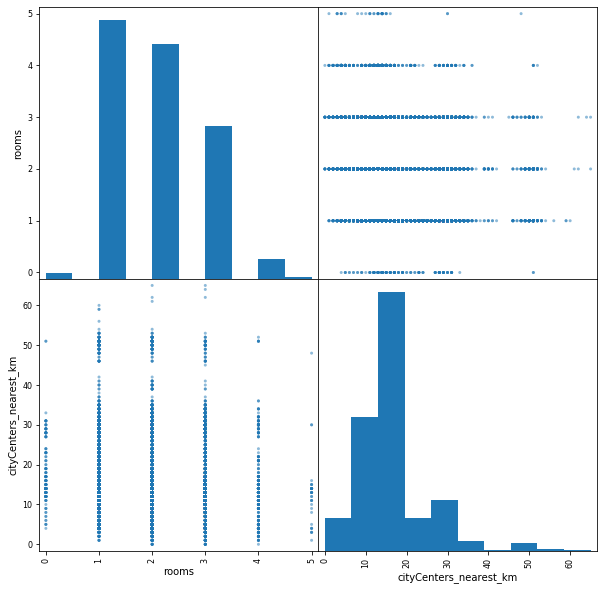

In [107]:
pd.plotting.scatter_matrix(rooms_km, figsize=(10, 10))
plt.show()

Как и предполагали на прошлом рисунке значения скакали из-за количества комнат. Расположение на комнаты никак не влияет. График идет почти ровно. В центре видим,что продаются в основном 2 комнатные квартиры,но и 3 комнатные.

In [108]:
per_km = data.loc[:,['cost_per_m2', 'cityCenters_nearest_km']]
per_km.corr()

,cost_per_m2,cityCenters_nearest_km
cost_per_m2,1.000000,-0.381172
cityCenters_nearest_km,-0.381172,1.000000


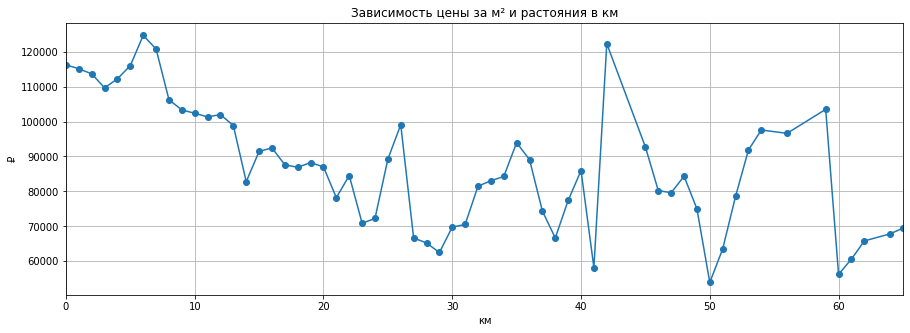

In [109]:
(data
    .groupby('cityCenters_nearest_km')['cost_per_m2'].median()
    .plot(x='cityCenters_nearest_km',y='cost_per_m2',style='o-',grid=True, figsize=(15,5))
) #построим гистограмму
plt.title('Зависимость цены за м² и растояния в км')
plt.ylabel('₽')
plt.xlabel('км')
plt.show()

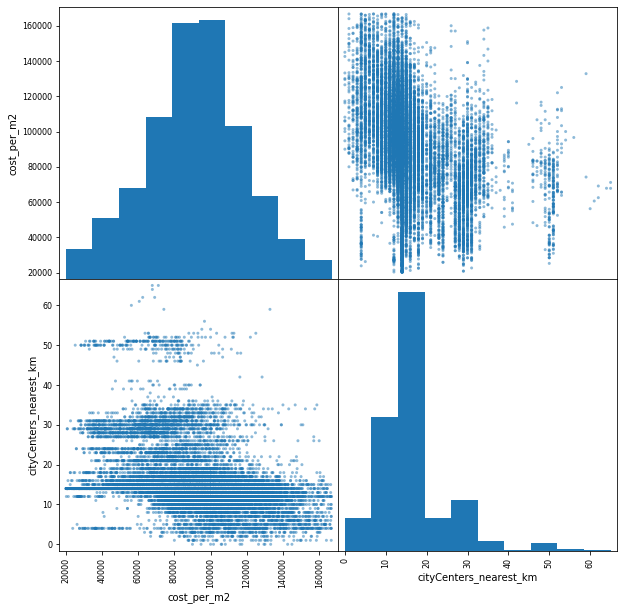

In [110]:
pd.plotting.scatter_matrix(per_km, figsize=(10, 10))
plt.show()

Зависимость есть от растояния на цену. В центре видем цена варирует 10-12млн.р. Потом идет спад и иногда сплески,но это все элитные районы. Логично,что в центре мы наблюдаем большое количество объявлений,в следствии чего,больше и показателей и продаж.

In [111]:
rooms_last = data.loc[:,['last_price', 'rooms']]
rooms_last.corr()

,last_price,rooms
last_price,1.000000,0.453327
rooms,0.453327,1.000000


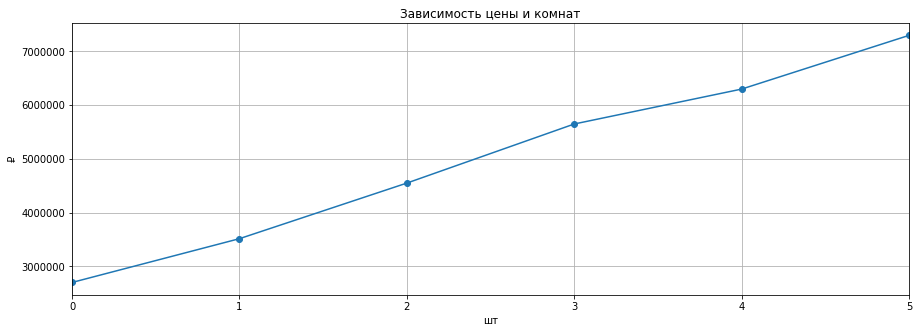

In [112]:
(data
    .groupby('rooms')['last_price'].median()
    .plot(x='rooms',y='last_price',style='o-',grid=True, figsize=(15,5))
) #построим гистограмму
plt.title('Зависимость цены и комнат')
plt.ylabel('₽')
plt.xlabel('шт')
plt.show()

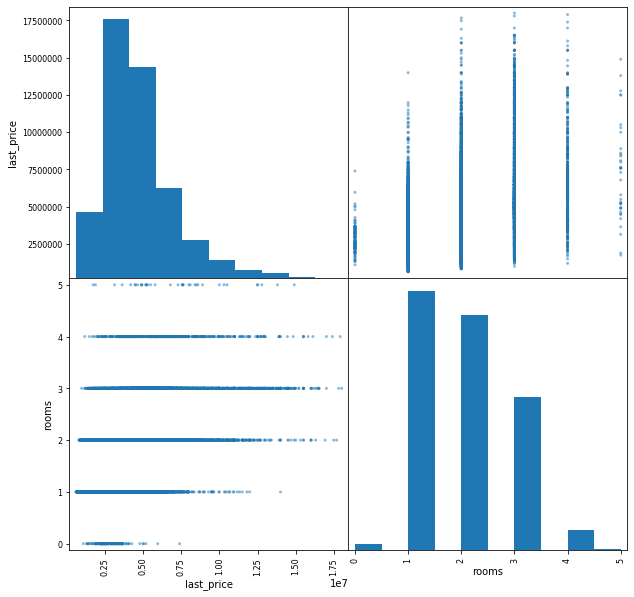

In [113]:
pd.plotting.scatter_matrix(rooms_last, figsize=(10, 10))
plt.show()

Зависимость слабая между ценой и количеством комнат. Потому что в центре в основном продаются двушки, а после и цена скачет и количество комнат.

Видим, что в центре все показатели выше или на уровне с не центром.Объявлений больше,продаваемость выше.

## Общий вывод

Пик продаваемости квартир:
    
- город Санкт-Петербург
- площадь 40м²-70м²
- цена 75т.р/м²-113т.р/м²
- 1-3 комнатные
- с потолками 2.5м-2.7м.

Чаще всего продажа совершается:

- на 36-199 дни,пик продаж идет на 45 и 60 дней
- по удаленности 11км-17км.

Зависимость на цену м² квартиры влияет:

- удаленность от центра
- от этажа,но не сильно,в основном покупают последний этаж,первый гораздо меньше
- слабо зависит от площади квартиры
- почти не зависит количество комнат,дата,месяц и год.

В основном покупают квартиры в Санкт-Петербурге,минимальная и максимальная цена/м² там. 

По Питеру лидируют квартиры:

- 2 комнатные
- с высотой потолка 2.7м
- с площадью 60м²-75м²
- с ценой 10-12млн.р.

Цена за м² высокая в престижных районах-Пушкин, Петергоф.

Самые популярные объявления в:
1. Санкт-Петербург
2. поселок Шушары
3. Всеволожск
4. Колпино
5. поселок Мурино
6. Пушкин
7. поселок Парголово
8. Гатчина
9. Выборг
10. деревня Кудрово.